In [175]:
# Import libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# Extract data (keep unaltered)
data_orig = pd.read_csv('../../ETL/Load/stockData.csv', header=(0), sep=';')
data = data_orig.copy()

In [177]:
# Describe original Data
data_orig.describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,CLASS
count,11363.000000,11363.000000,11363.000000,11363.000000,11363.000000,11363.000000,1.136300e+04,1.136300e+04,1.136300e+04,1.136300e+04,11363.000000,11363.000000
mean,-531.526993,33.890718,-0.025214,0.338965,4.741765,51.899025,1.533774e+10,1.978991e+10,3.818294e+09,inf,3.918511,0.097421
std,15684.409094,508.396423,3.095612,2.592203,78.270803,1018.558834,2.748858e+10,6.773164e+10,2.313760e+10,NaN,91.344843,0.296544
min,-765054.927367,-664.507625,-63.574215,-66.250000,-0.000000,-1249.308423,6.943000e+06,0.000000e+00,4.469333e+04,7.070553e-02,-111.585170,0.000000
25%,2.253817,5.016680,0.036619,0.000000,0.003078,0.683753,1.824915e+09,1.206523e+09,2.530056e+08,1.164050e+00,0.170000,0.000000
50%,8.823358,9.895760,0.120799,0.282966,0.021980,1.576686,5.417423e+09,3.935138e+09,7.231214e+08,1.629700e+00,0.920250,0.000000
75%,23.116721,17.793117,0.197393,0.594902,0.058705,3.693672,1.594072e+10,1.333942e+10,1.821185e+09,2.419938e+00,2.175100,0.000000
max,12635.786682,14885.774638,11.746541,45.098061,2196.206875,38484.339615,2.149780e+11,7.532630e+11,4.176953e+11,inf,2770.000000,1.000000


In [178]:
# Function to remove outliers using std
def remove_outliers_std(data, column, factor = 3):
    data_std = data[column].std()
    data_mean = data[column].mean()
    lower_bound = data_mean - factor * data_std
    upper_bound = data_mean + factor * data_std
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [179]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column, factor = 1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [182]:
# List of features and the class column
features = data_orig.columns.tolist()[2:-1]
binary_class = data_orig.columns.tolist()[-1]

data_cleaned = data_orig.copy()

# Replace inf values by very large number
data_cleaned.replace(np.inf, 1e20, inplace=True)

# Clean outliers from data
method = 'std' # std or iqr

if method == 'std':
    for feature in features:
        data_cleaned = remove_outliers_std(data_cleaned, feature)
elif method == 'iqr':
    for feature in features:
        data_cleaned = remove_outliers_iqr(data_cleaned, feature)
    
# Describe original Data
data_cleaned.describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,CLASS
count,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,1.027700e+04,1.027700e+04,1.027700e+04,10277.000000,10277.000000,10277.000000
mean,2.470449,12.050524,0.115610,0.382952,0.785271,4.663765,1.044722e+10,9.572667e+09,1.823184e+09,2.574727,1.168078,0.098959
std,302.879809,14.993470,0.499446,0.713919,10.429633,20.097389,1.411653e+10,1.424500e+10,3.988459e+09,5.229808,3.821124,0.298621
min,-7117.842535,-155.149388,-7.546822,-3.785075,-0.000000,-287.902125,6.943000e+06,0.000000e+00,3.433966e+06,0.070706,-24.074100,0.000000
25%,2.904149,4.927049,0.040970,0.000000,0.003497,0.760427,1.788028e+09,1.315407e+09,2.651493e+08,1.164050,0.204950,0.000000
50%,10.218890,9.472632,0.121777,0.292106,0.021207,1.708059,4.949483e+09,3.935138e+09,6.756896e+08,1.627560,0.930000,0.000000
75%,24.499481,16.655162,0.200916,0.600155,0.057338,3.831537,1.324252e+10,1.190003e+10,1.643998e+09,2.380767,2.117680,0.000000
max,5788.702364,151.342901,4.200343,6.631831,239.690794,306.162369,8.914335e+10,1.126668e+11,6.923709e+10,74.805876,22.268880,1.000000


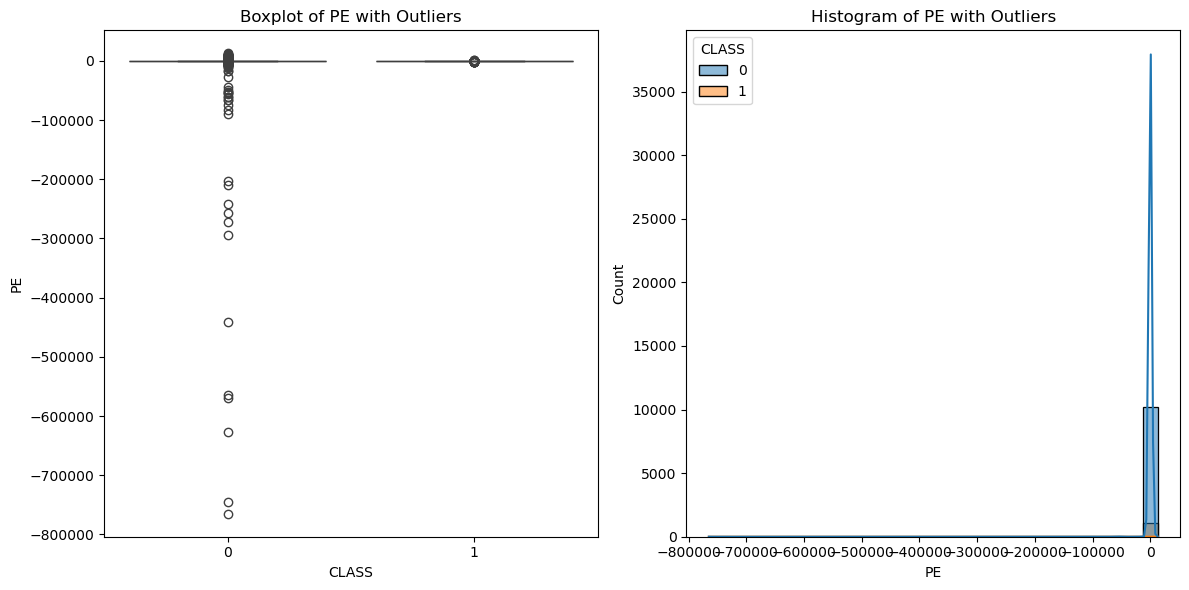

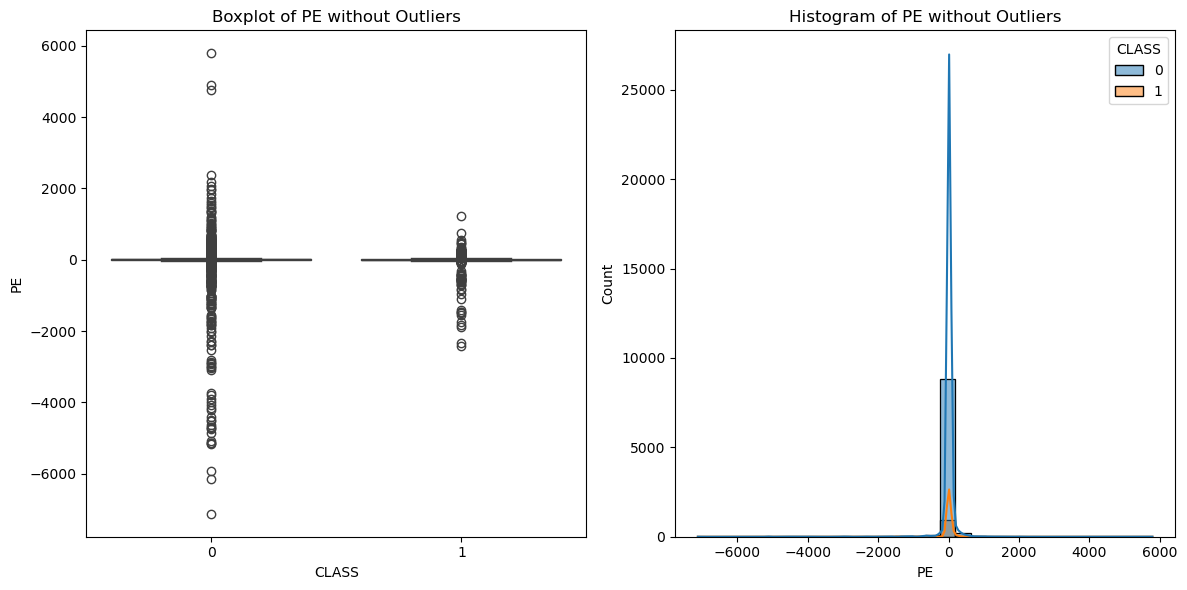

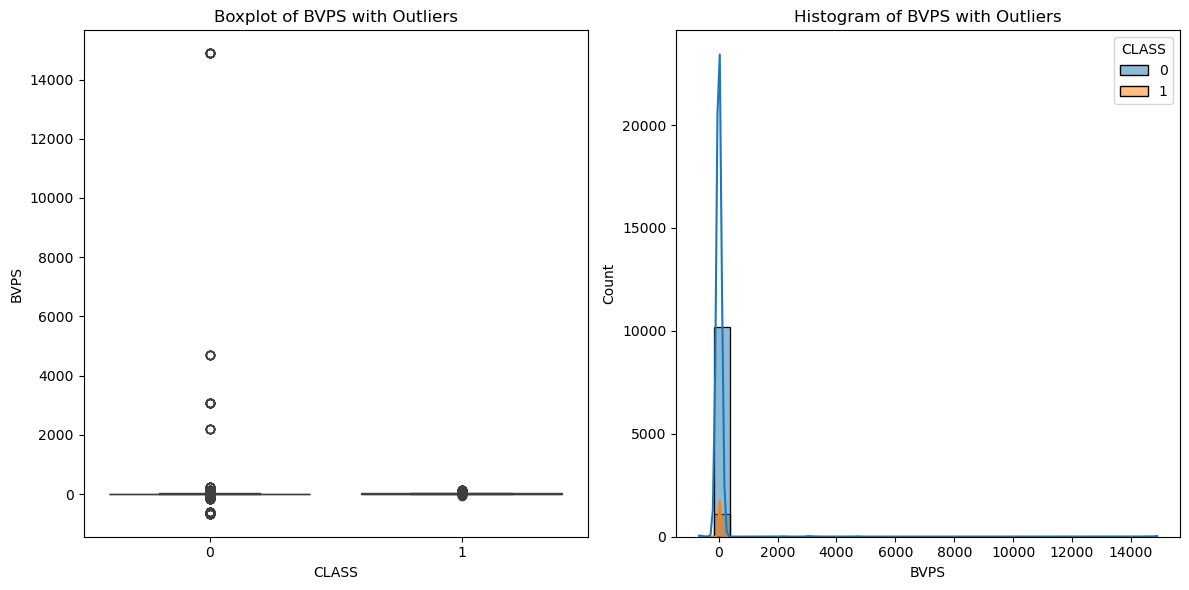

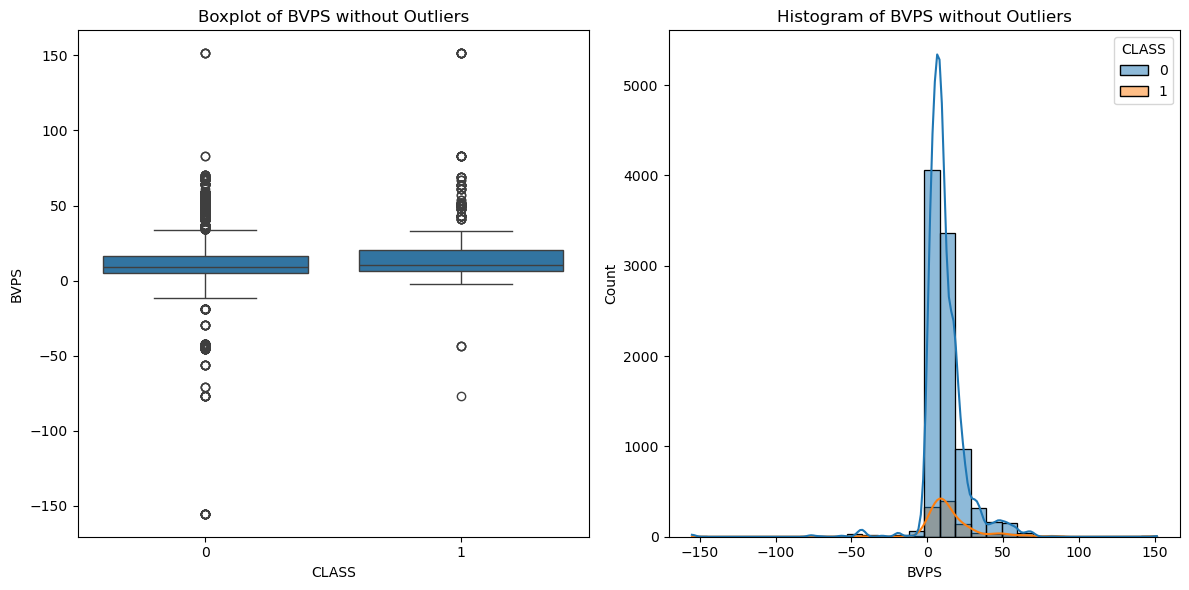

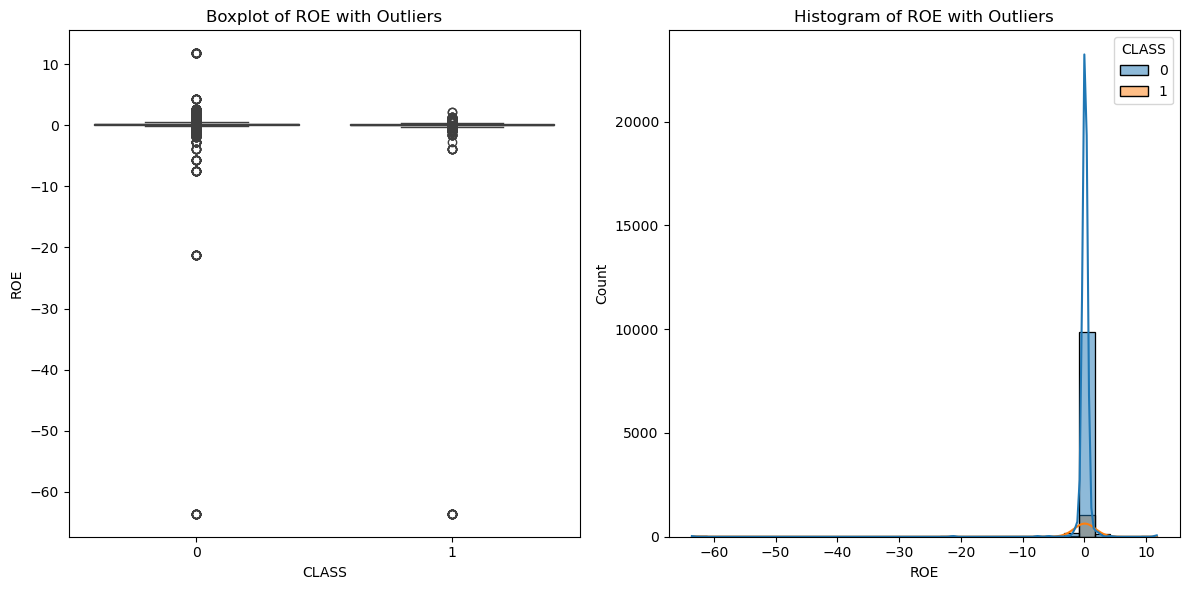

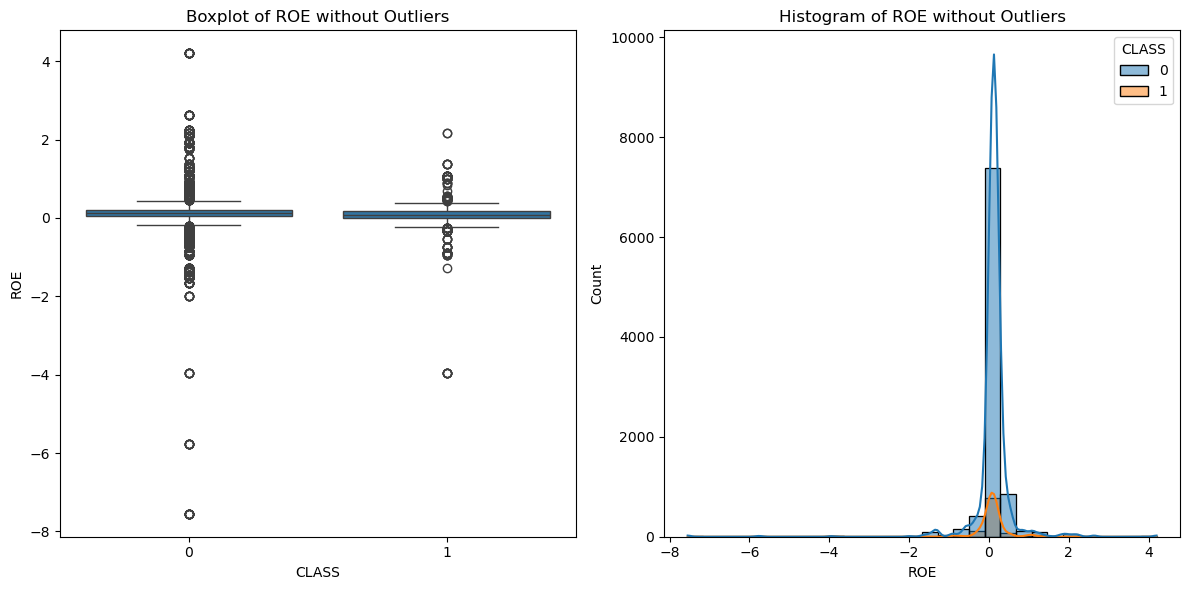

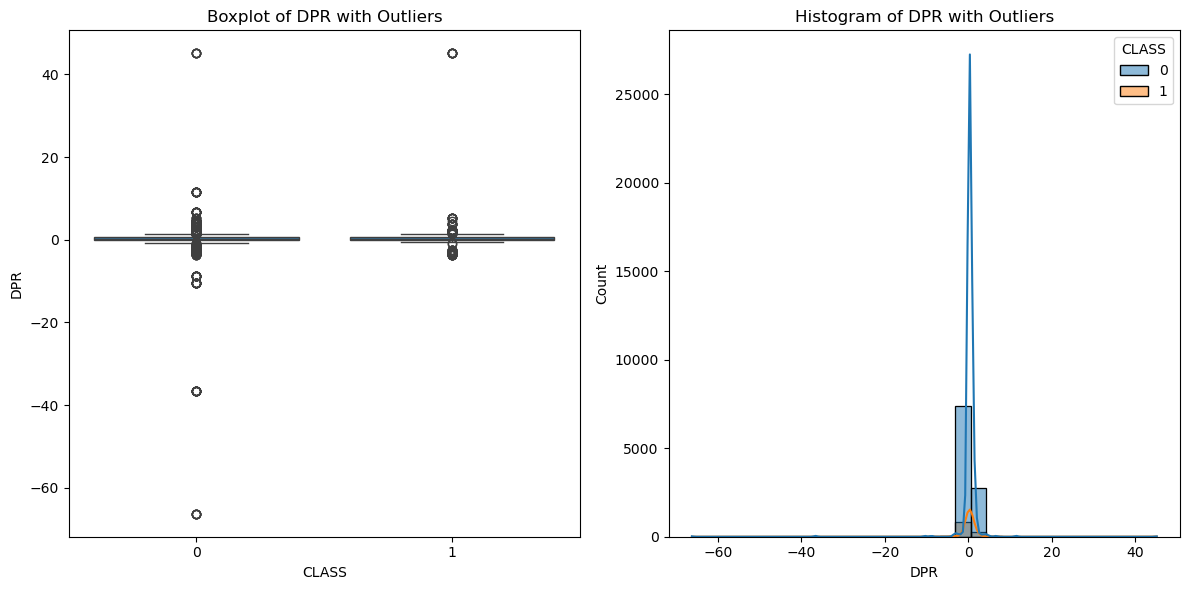

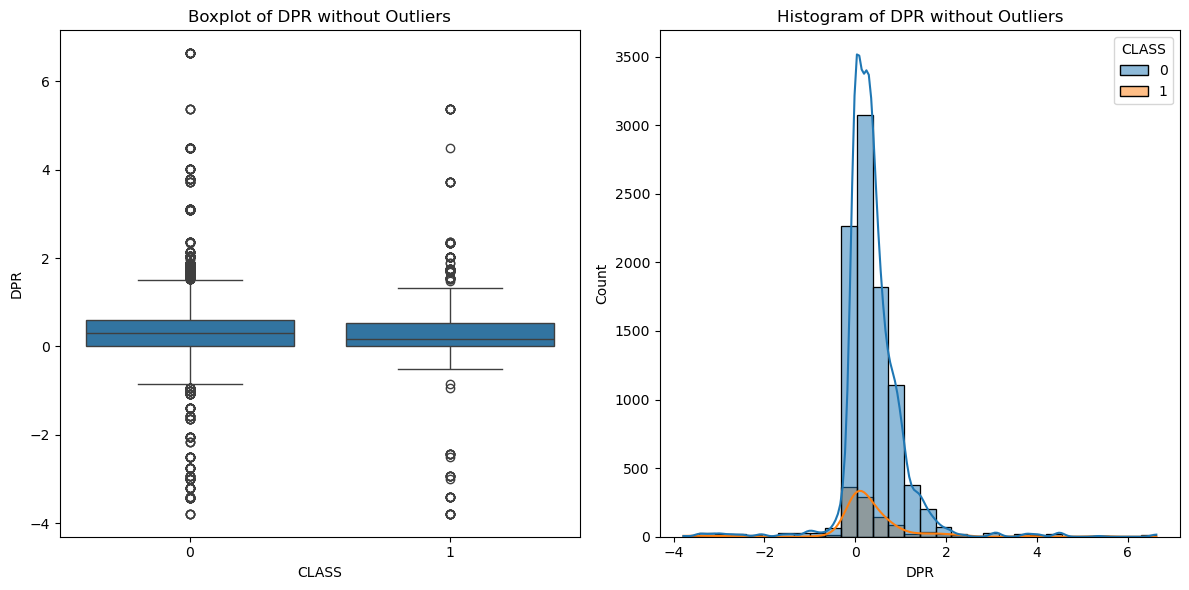

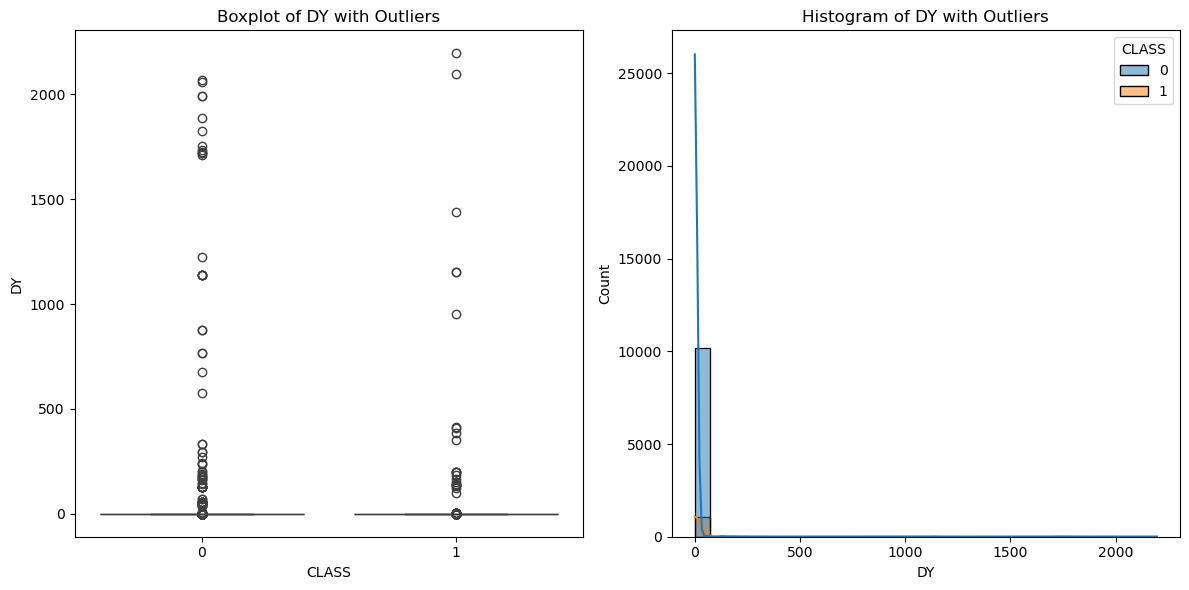

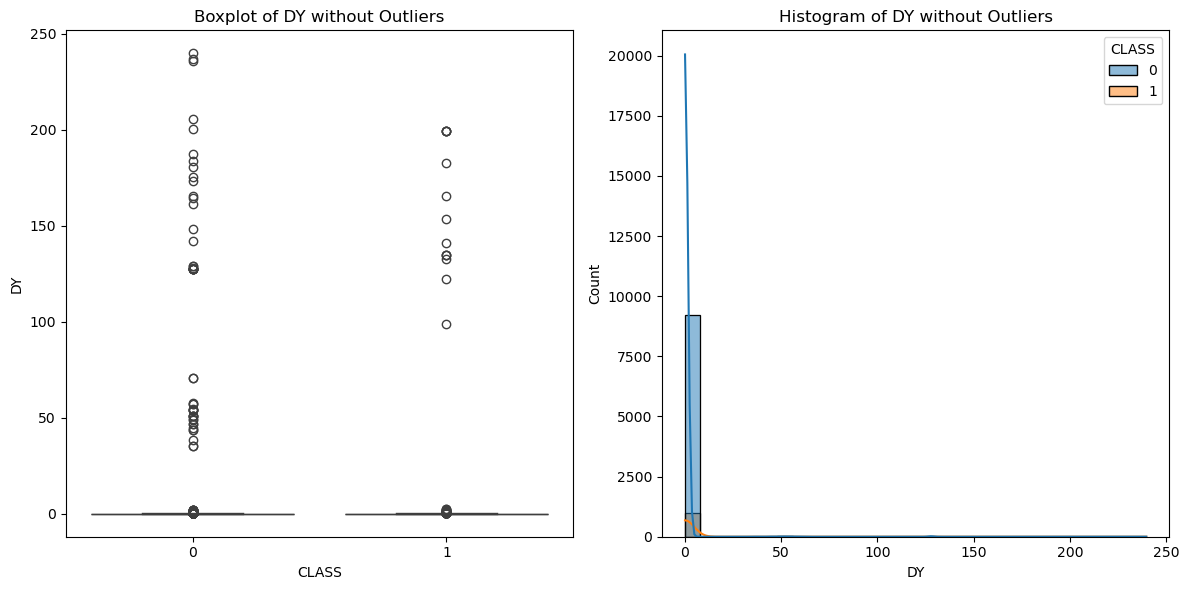

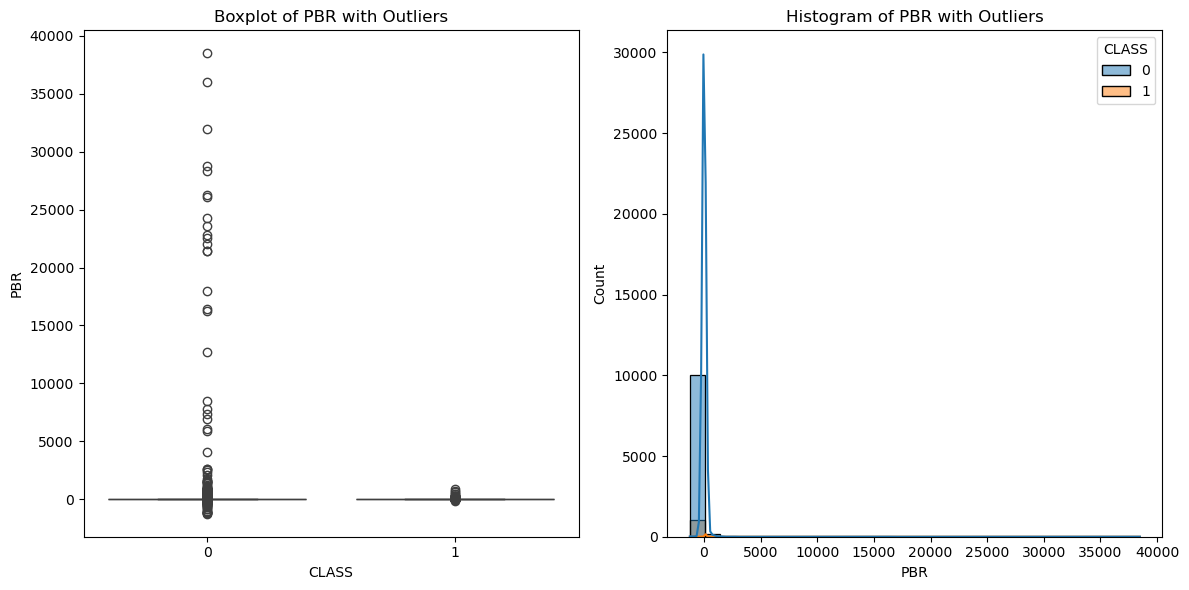

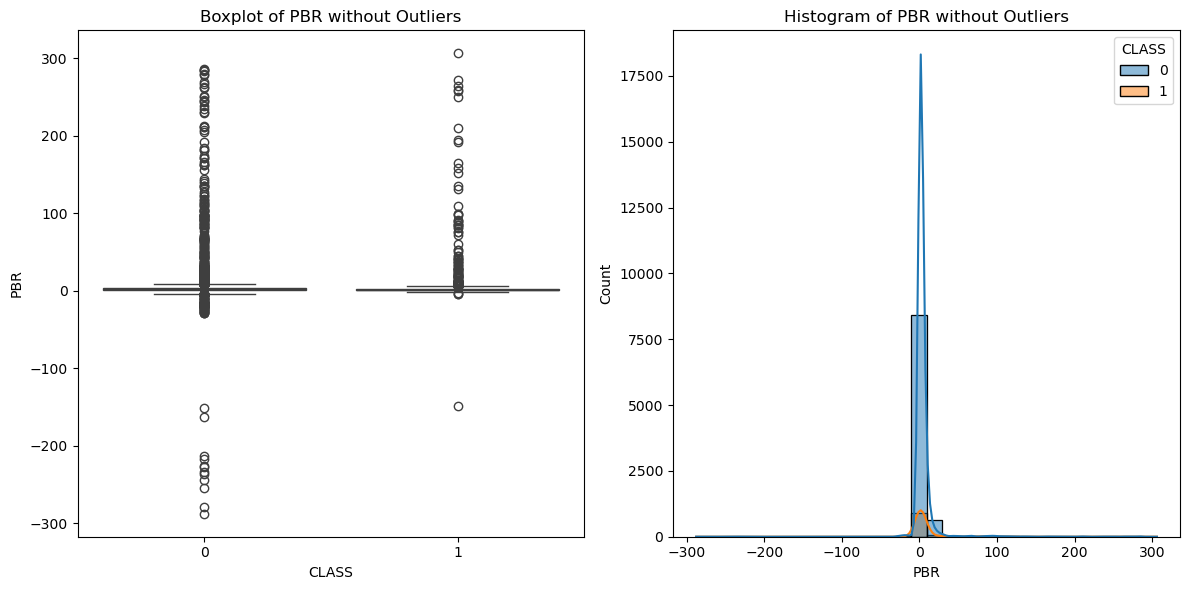

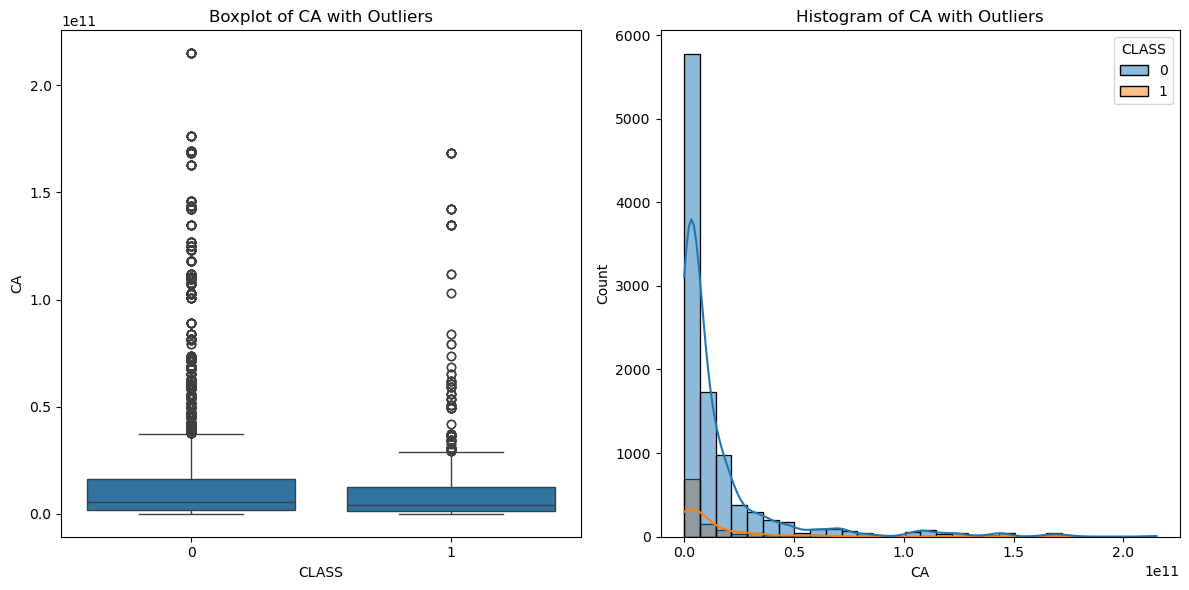

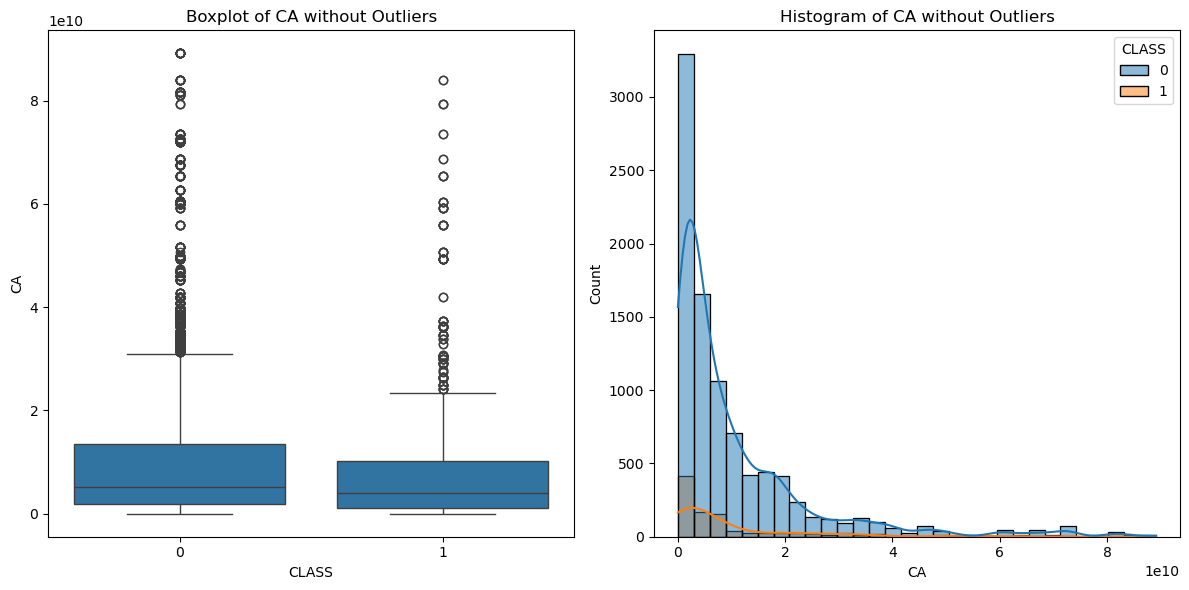

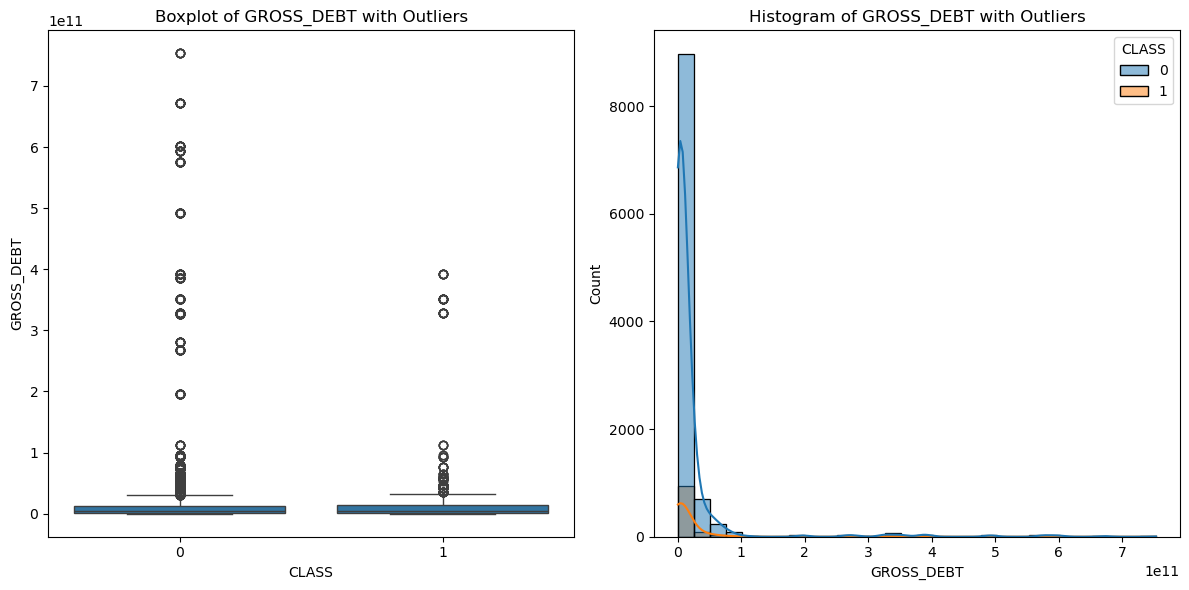

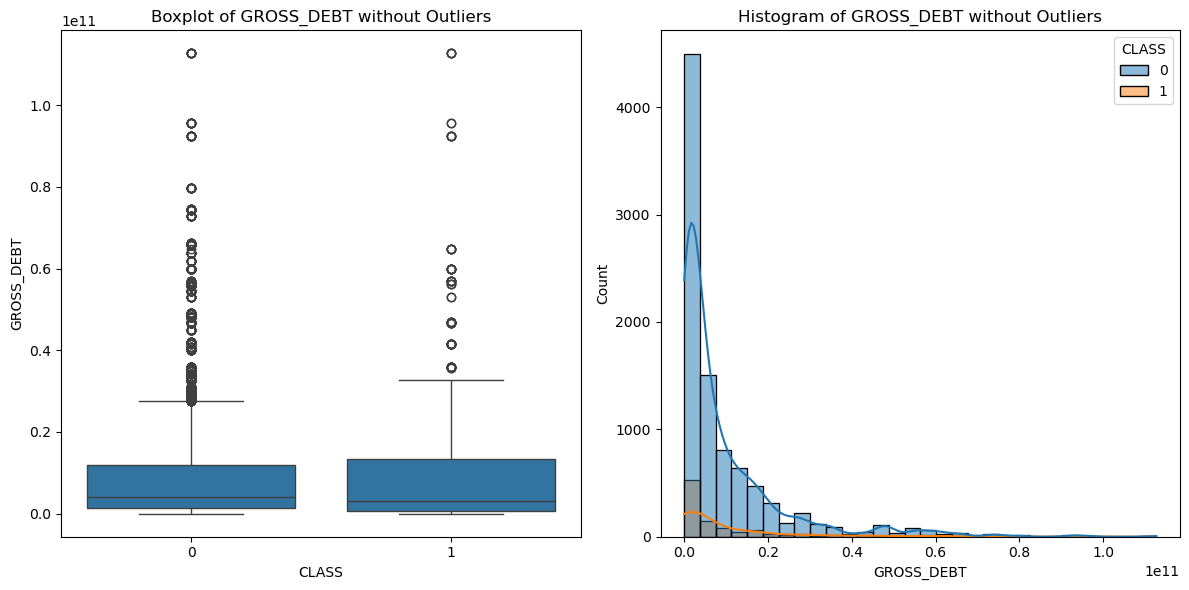

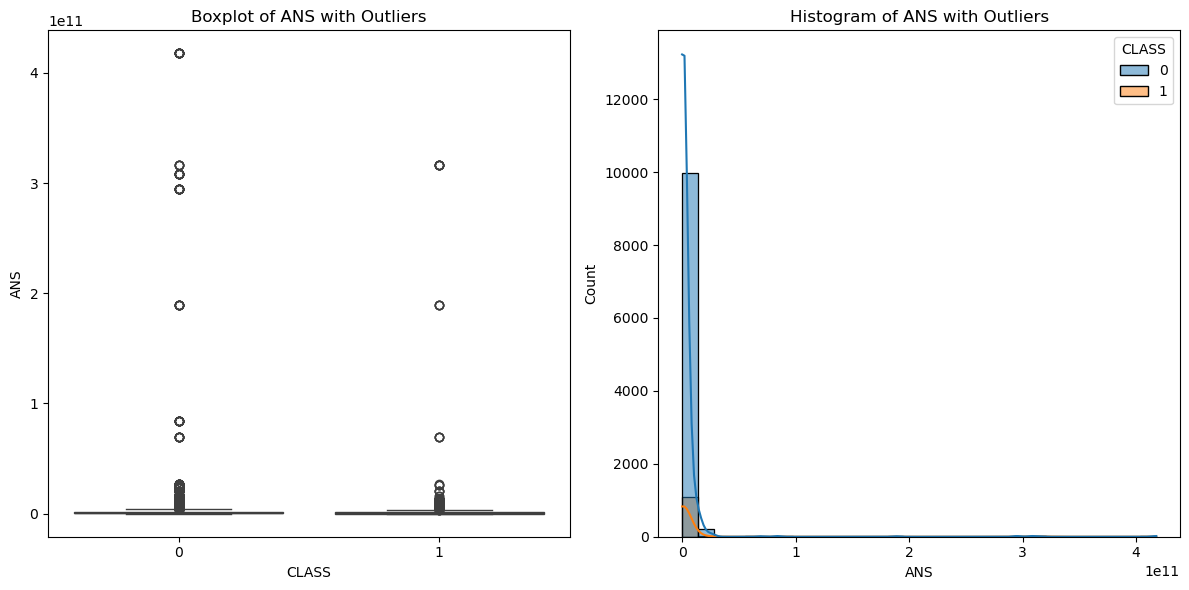

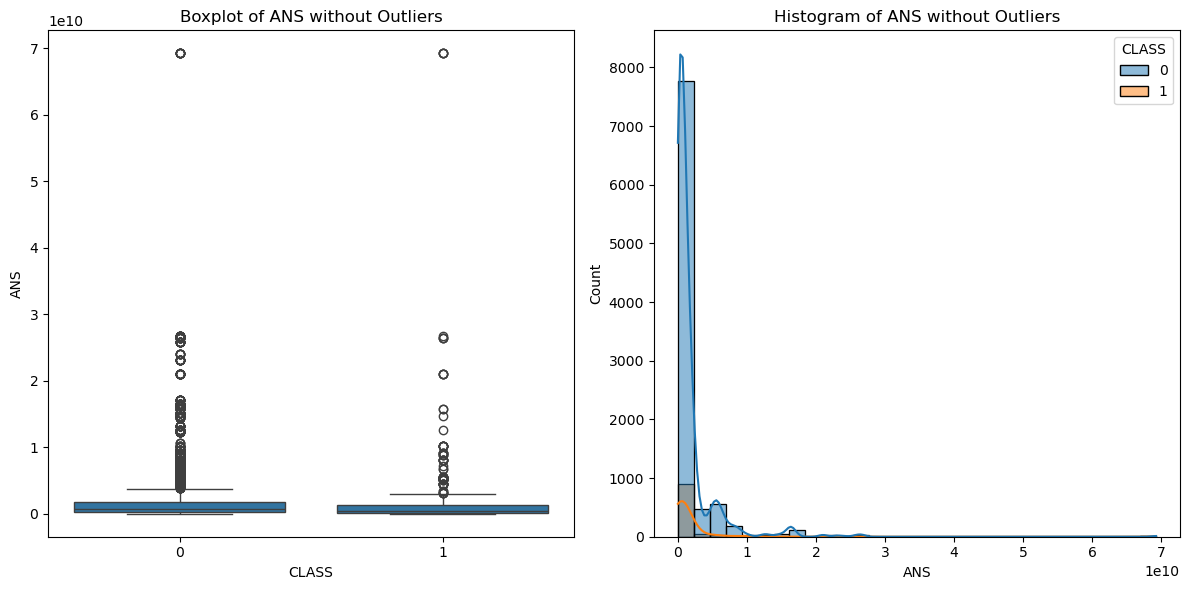

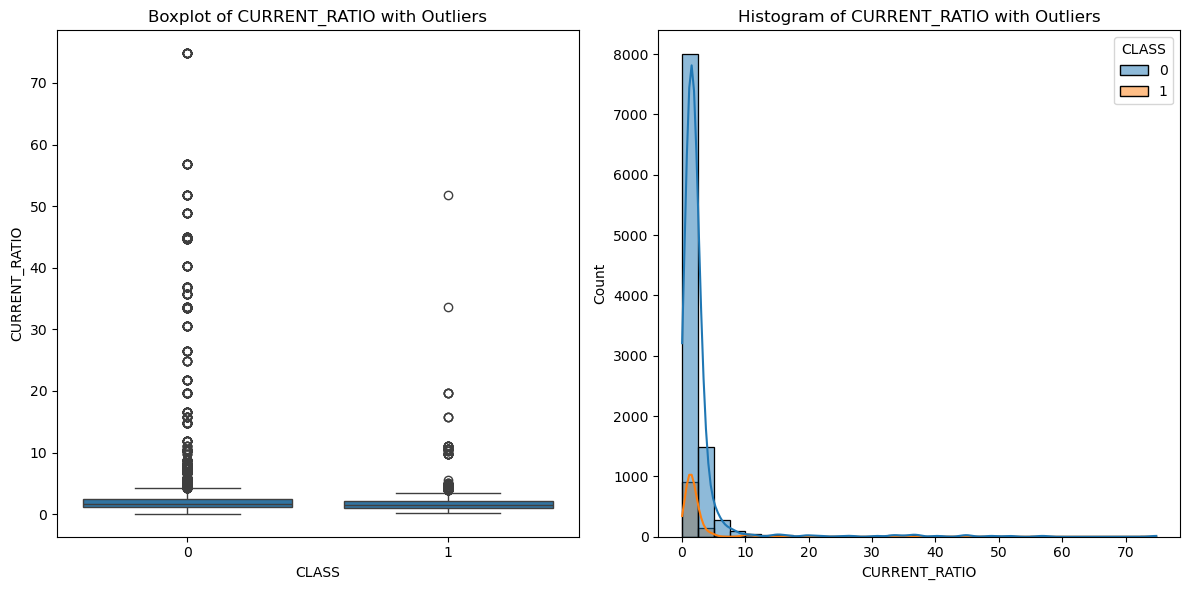

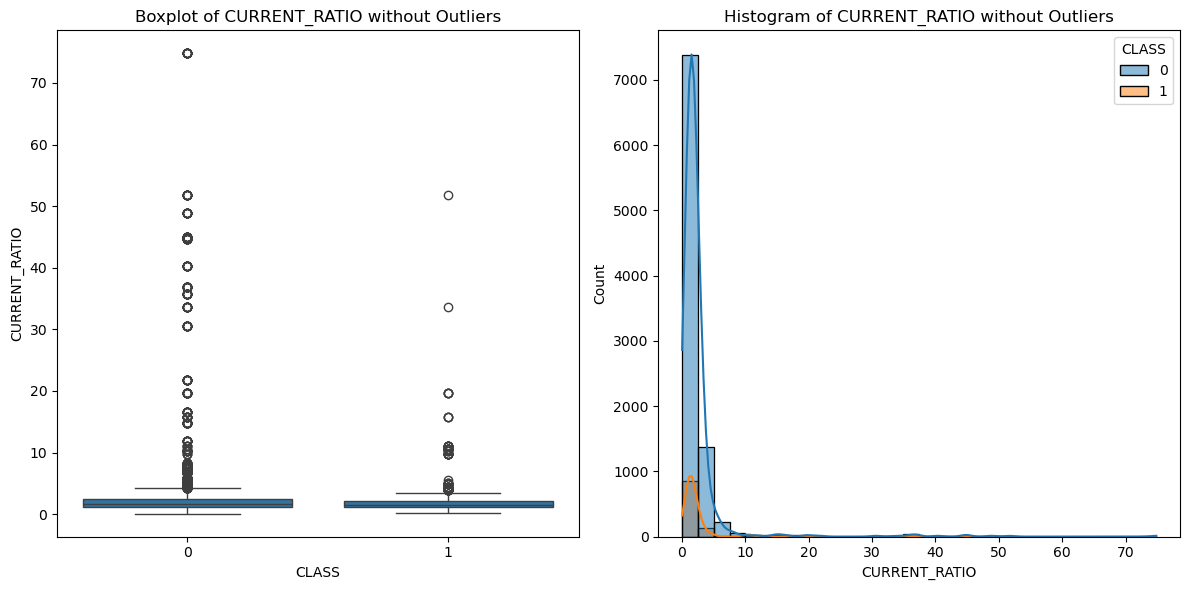

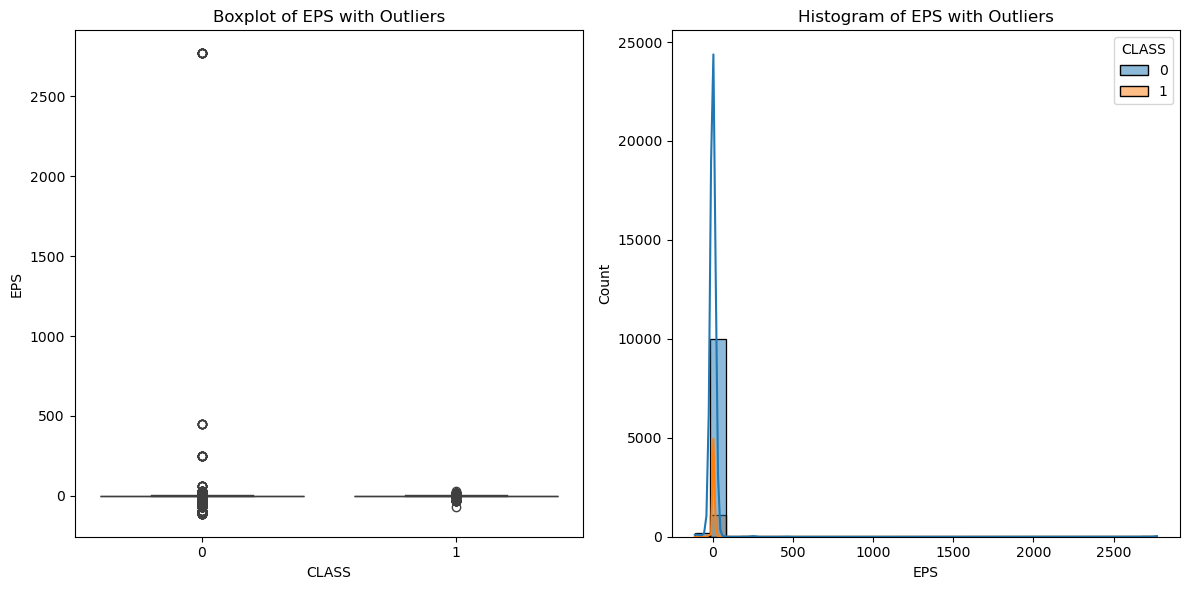

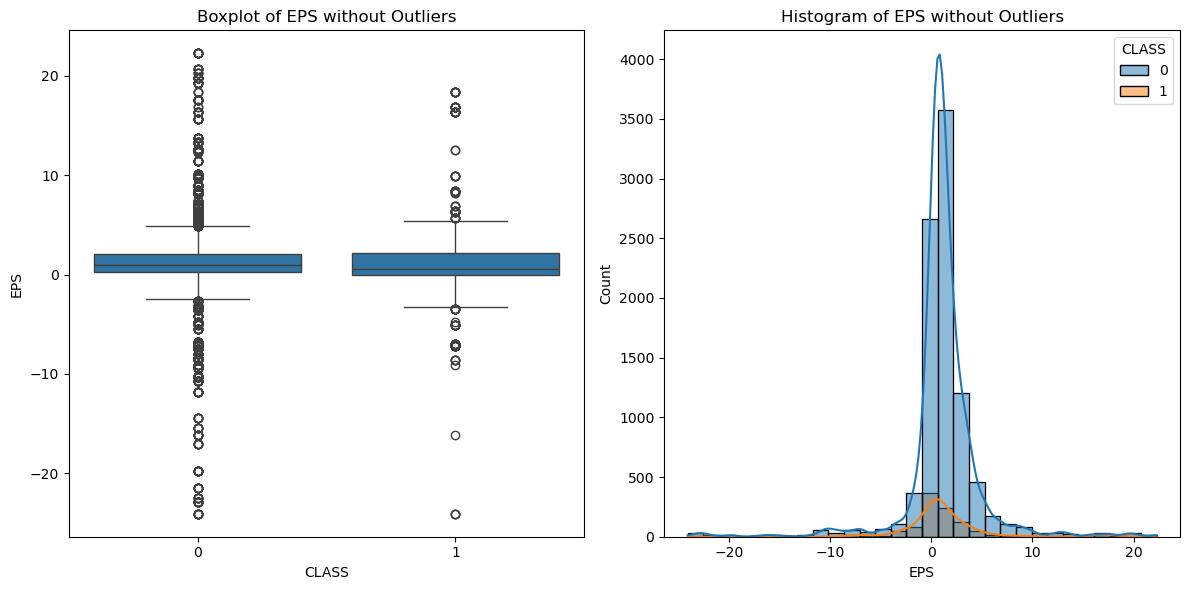

In [174]:
# Boxplots and histograms with and without outliers for all the features

# List of features and the class column
features = data_orig.columns.tolist()[2:-1]
binary_class = data_orig.columns.tolist()[-1]

# Plotting boxplots and histograms
for feature in features:
    # Original data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_orig, x=binary_class, y=feature)
    plt.title(f'Boxplot of {feature} with Outliers')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_orig, x=feature, hue=binary_class, kde=True, bins=30)
    plt.title(f'Histogram of {feature} with Outliers')
    plt.tight_layout()
    plt.show()
    
    # Data without outliers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_cleaned, x=binary_class, y=feature)
    plt.title(f'Boxplot of {feature} without Outliers')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_cleaned, x=feature, hue=binary_class, kde=True, bins=30)
    plt.title(f'Histogram of {feature} without Outliers')
    plt.tight_layout()
    plt.show()